In [1]:
import pandas as pd

# File path to the cleaned, centroid-calculated dataset
file_path = r"C:\FRR40\RAT\sample_data\processed\combined_data\final_centroid_data.p"

# Load the dataset
df = pd.read_pickle(file_path)

# General information about the dataset
print("\n--- Dataset Information ---")
print(df.info())

# Display basic statistics for numerical columns
print("\n--- Summary Statistics for Numerical Columns ---")
print(df.describe())

# Check for missing data
print("\n--- Missing Data Per Column ---")
print(df.isnull().sum())

# Check the distribution of the number of objects per radar cycle
df["num_objects"] = df["x"].apply(len)
print("\n--- Distribution of Object Count Per Radar Cycle ---")
print(df["num_objects"].describe())



--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                632 non-null    float64
 1   rcs                      632 non-null    object 
 2   distance                 632 non-null    object 
 3   angleAzimuth             632 non-null    object 
 4   angleElevation           632 non-null    object 
 5   radialVelocity           632 non-null    object 
 6   radialVelocityDomainMax  632 non-null    float64
 7   orientation              632 non-null    object 
 8   x                        632 non-null    object 
 9   y                        632 non-null    object 
 10  width_edge_mean          632 non-null    object 
 11  length_edge_mean         632 non-null    object 
 12  status_measurement       632 non-null    object 
 13  status_movement          632 non-null    object 
 1

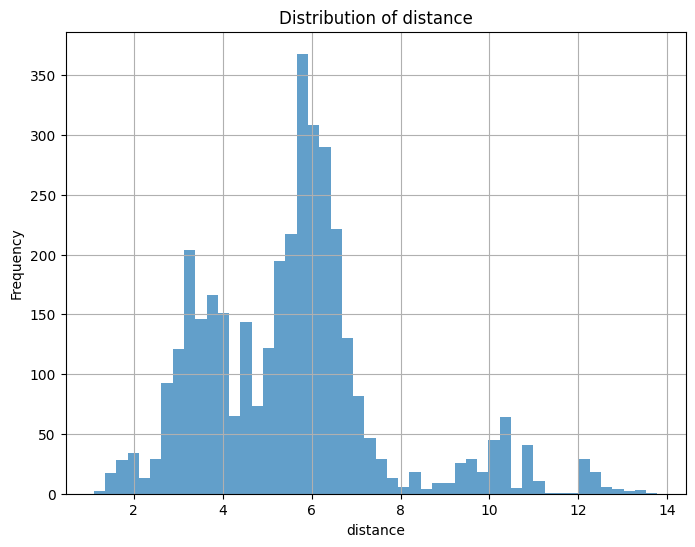

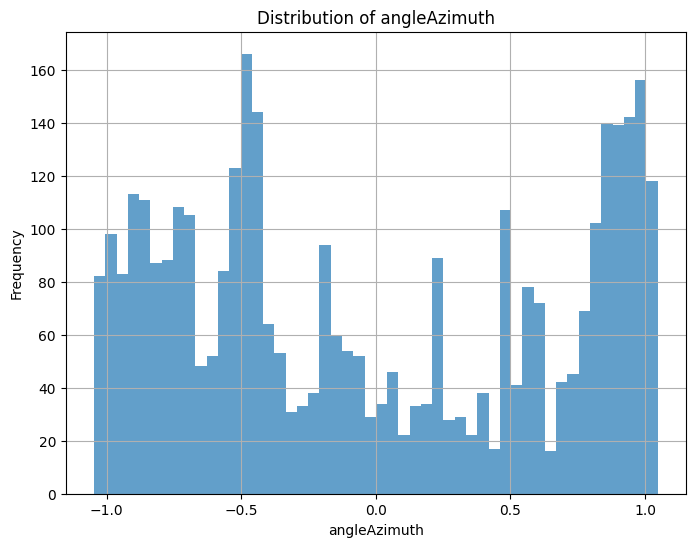

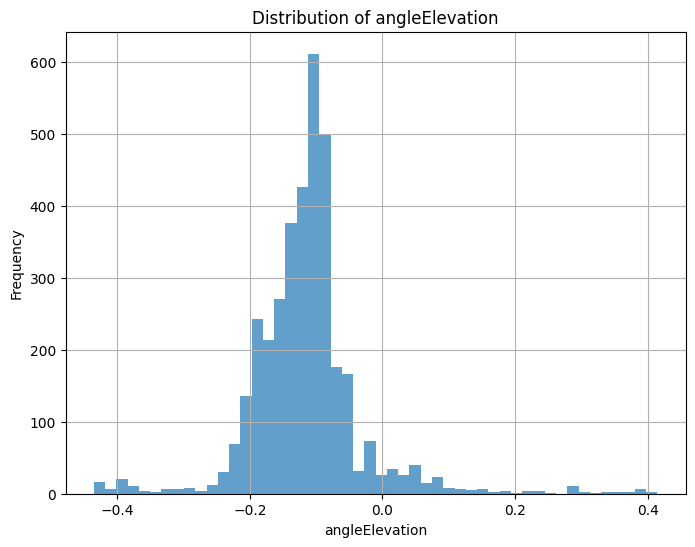

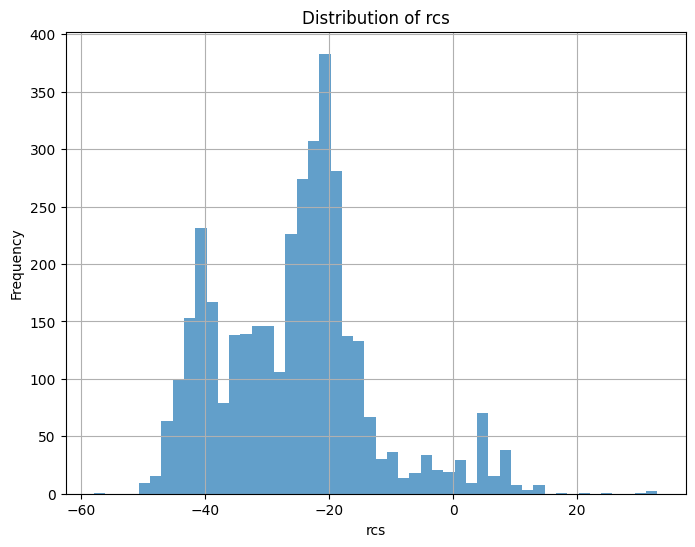

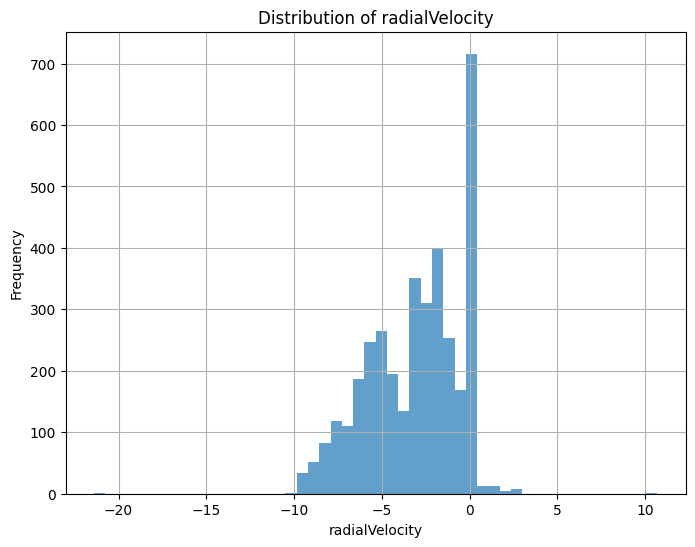

In [2]:
import matplotlib.pyplot as plt

# List of numerical columns to analyze
numerical_columns = ["distance", "angleAzimuth", "angleElevation", "rcs", "radialVelocity"]

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    all_values = [item for sublist in df[column] for item in sublist]  # Flatten the column
    plt.hist(all_values, bins=50, alpha=0.7)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()


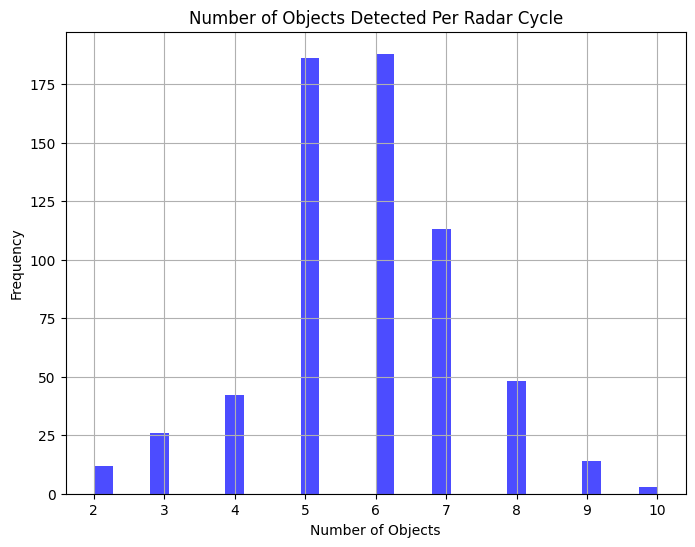

In [3]:
# Plot object count per radar cycle
plt.figure(figsize=(8, 6))
plt.hist(df["num_objects"], bins=30, alpha=0.7, color="blue")
plt.title("Number of Objects Detected Per Radar Cycle")
plt.xlabel("Number of Objects")
plt.ylabel("Frequency")
plt.grid()
plt.show()


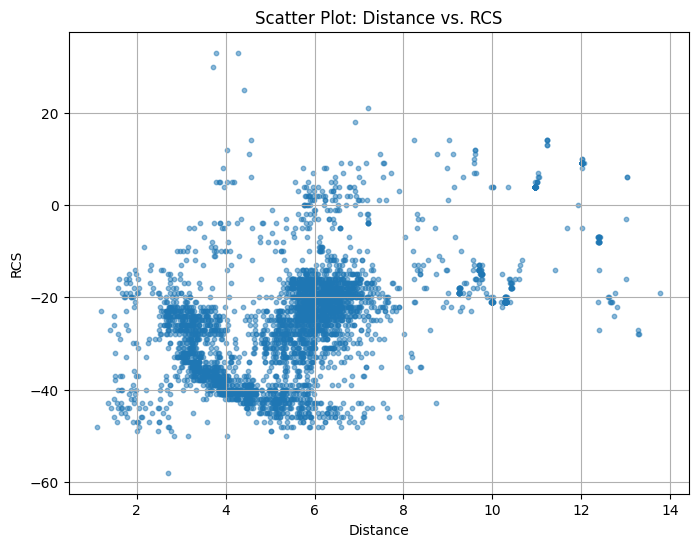

In [4]:
# Extract all distance and rcs values
all_distances = [item for sublist in df["distance"] for item in sublist]
all_rcs = [item for sublist in df["rcs"] for item in sublist]

plt.figure(figsize=(8, 6))
plt.scatter(all_distances, all_rcs, alpha=0.5, s=10)
plt.title("Scatter Plot: Distance vs. RCS")
plt.xlabel("Distance")
plt.ylabel("RCS")
plt.grid()
plt.show()


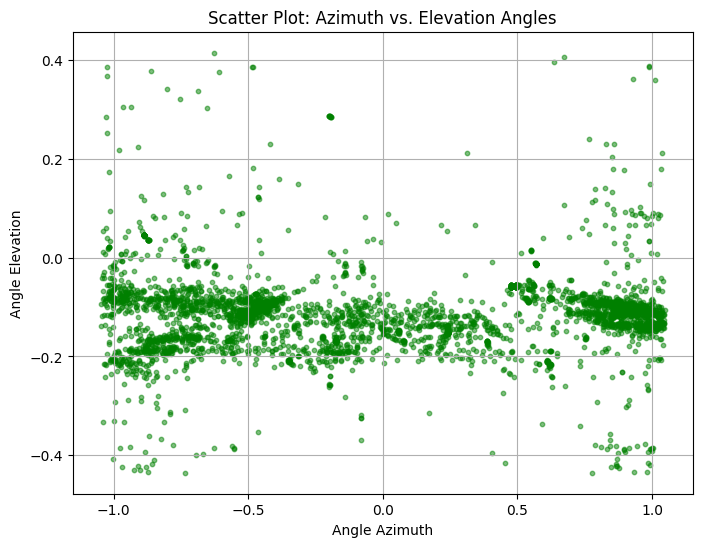

In [5]:
all_azimuths = [item for sublist in df["angleAzimuth"] for item in sublist]
all_elevations = [item for sublist in df["angleElevation"] for item in sublist]

plt.figure(figsize=(8, 6))
plt.scatter(all_azimuths, all_elevations, alpha=0.5, s=10, color="green")
plt.title("Scatter Plot: Azimuth vs. Elevation Angles")
plt.xlabel("Angle Azimuth")
plt.ylabel("Angle Elevation")
plt.grid()
plt.show()


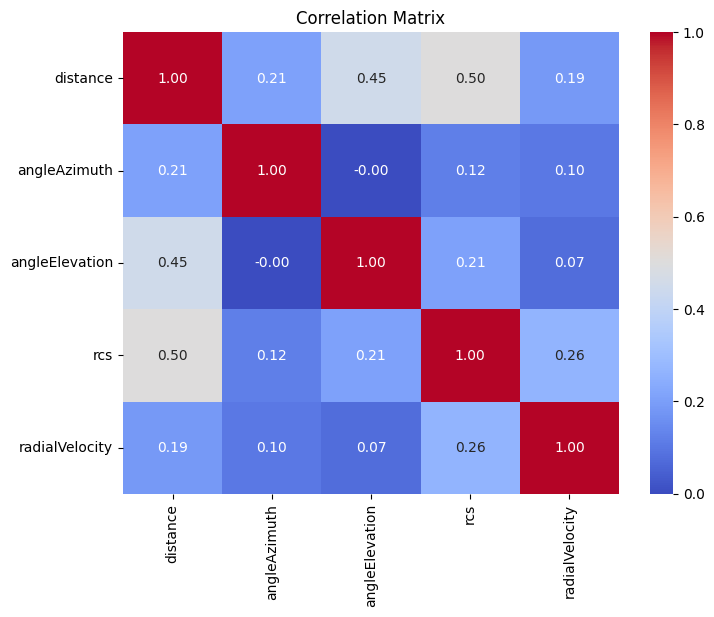

In [6]:
import seaborn as sns

# Flatten numerical columns for correlation
flat_df = pd.DataFrame({
    "distance": [item for sublist in df["distance"] for item in sublist],
    "angleAzimuth": [item for sublist in df["angleAzimuth"] for item in sublist],
    "angleElevation": [item for sublist in df["angleElevation"] for item in sublist],
    "rcs": [item for sublist in df["rcs"] for item in sublist],
    "radialVelocity": [item for sublist in df["radialVelocity"] for item in sublist],
})

# Compute the correlation matrix
correlation_matrix = flat_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


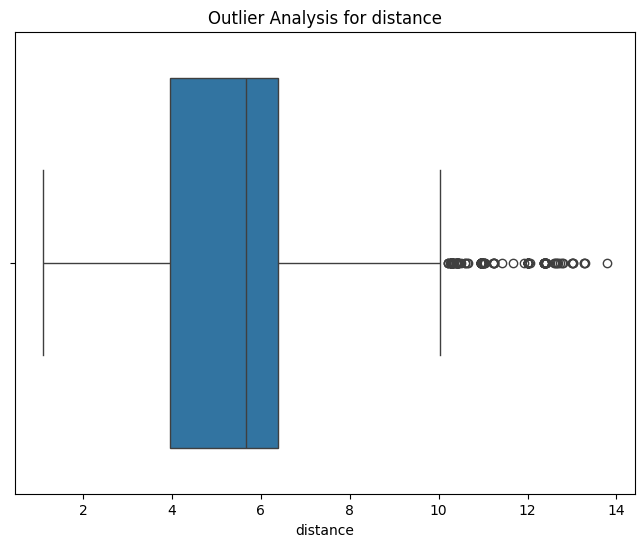

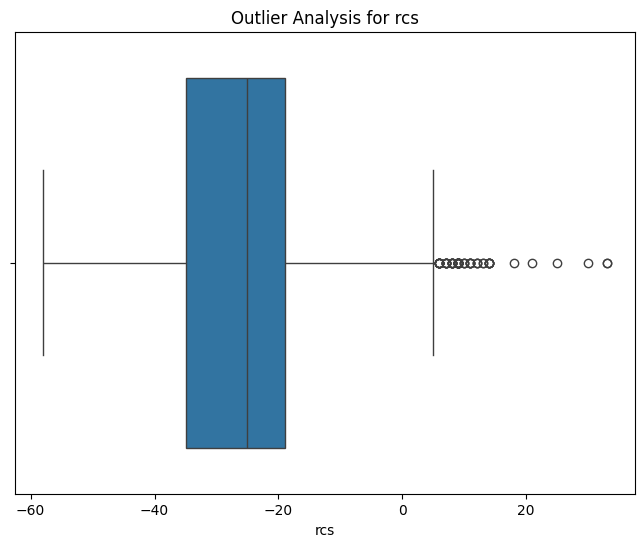

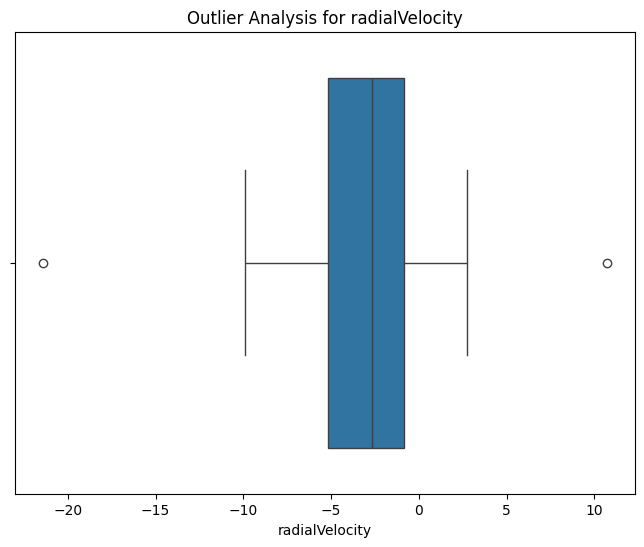

In [7]:
# Boxplots to identify outliers
for col in ["distance", "rcs", "radialVelocity"]:
    all_values = [item for sublist in df[col] for item in sublist]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=all_values)
    plt.title(f"Outlier Analysis for {col}")
    plt.xlabel(col)
    plt.show()


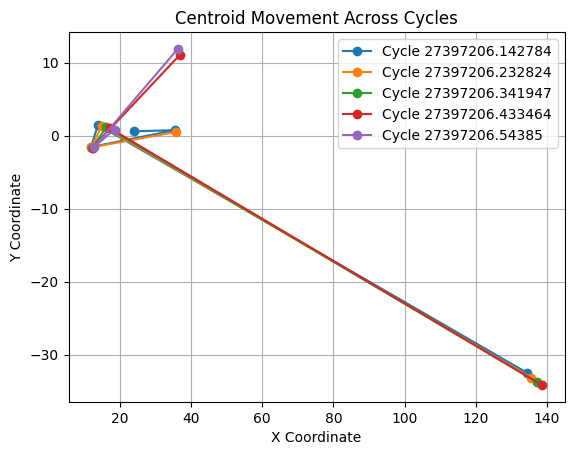

In [8]:
for idx, row in df.head(5).iterrows():  # Visualize for first 5 cycles
    centroids = row["centroids"]
    if centroids:
        x, y = zip(*centroids)
        plt.plot(x, y, marker="o", label=f"Cycle {row['timestamp']}")
plt.title("Centroid Movement Across Cycles")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid()
plt.show()


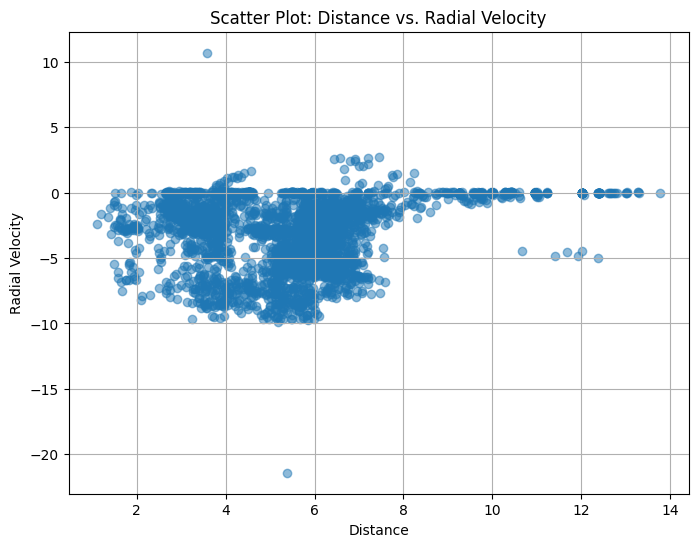

In [9]:
all_distances = [item for sublist in df["distance"] for item in sublist]
all_velocities = [item for sublist in df["radialVelocity"] for item in sublist]

plt.figure(figsize=(8, 6))
plt.scatter(all_distances, all_velocities, alpha=0.5)
plt.title("Scatter Plot: Distance vs. Radial Velocity")
plt.xlabel("Distance")
plt.ylabel("Radial Velocity")
plt.grid()
plt.show()


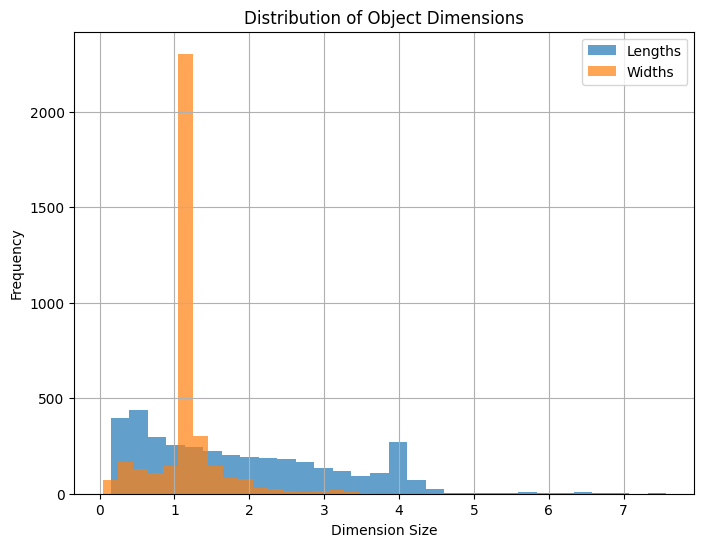

In [10]:
# Flatten dimensions for distribution
all_lengths = [item for sublist in df["length_edge_mean"] for item in sublist]
all_widths = [item for sublist in df["width_edge_mean"] for item in sublist]

plt.figure(figsize=(8, 6))
plt.hist(all_lengths, bins=30, alpha=0.7, label="Lengths")
plt.hist(all_widths, bins=30, alpha=0.7, label="Widths")
plt.title("Distribution of Object Dimensions")
plt.xlabel("Dimension Size")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()


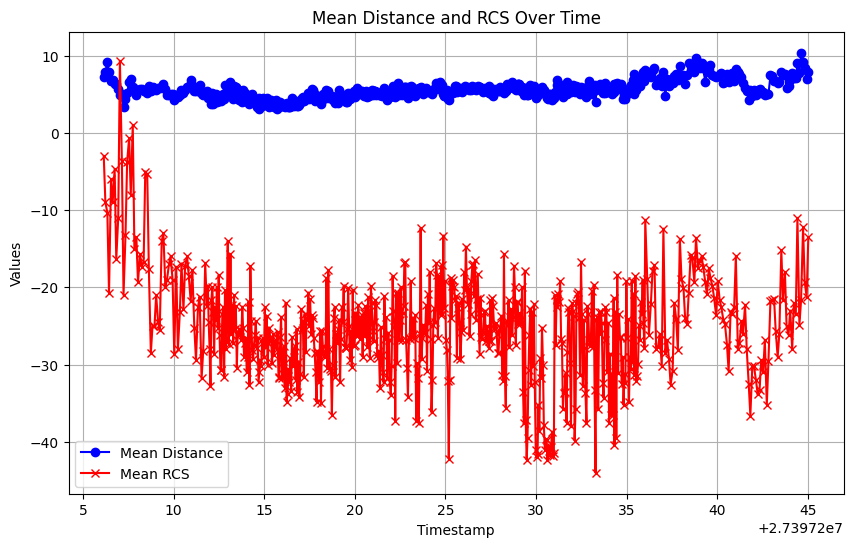

In [13]:
# Aggregate mean distance and rcs per cycle
import numpy as np
df["mean_distance"] = df["distance"].apply(lambda x: np.mean(x) if len(x) > 0 else np.nan)
df["mean_rcs"] = df["rcs"].apply(lambda x: np.mean(x) if len(x) > 0 else np.nan)

# Plot mean distance and rcs over time
plt.figure(figsize=(10, 6))
plt.plot(df["timestamp"], df["mean_distance"], label="Mean Distance", marker="o", color="blue")
plt.plot(df["timestamp"], df["mean_rcs"], label="Mean RCS", marker="x", color="red")
plt.title("Mean Distance and RCS Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()


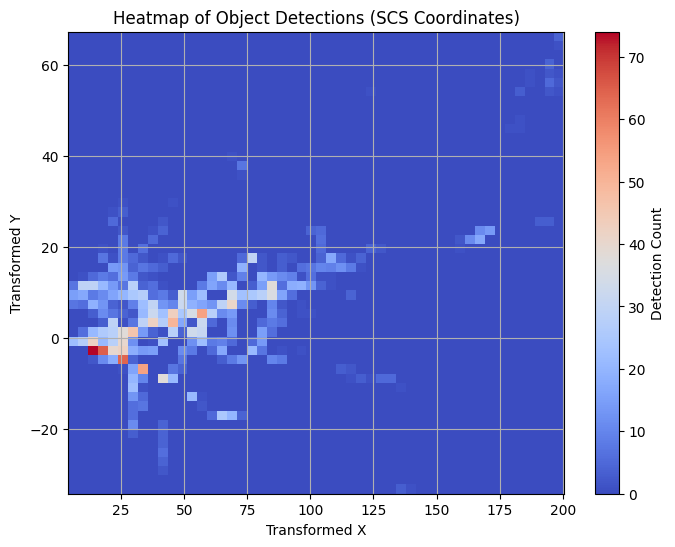

In [14]:
all_x = [item for sublist in df["transformed_x"] for item in sublist]
all_y = [item for sublist in df["transformed_y"] for item in sublist]

plt.figure(figsize=(8, 6))
plt.hist2d(all_x, all_y, bins=(50, 50), cmap="coolwarm")
plt.colorbar(label="Detection Count")
plt.title("Heatmap of Object Detections (SCS Coordinates)")
plt.xlabel("Transformed X")
plt.ylabel("Transformed Y")
plt.grid()
plt.show()


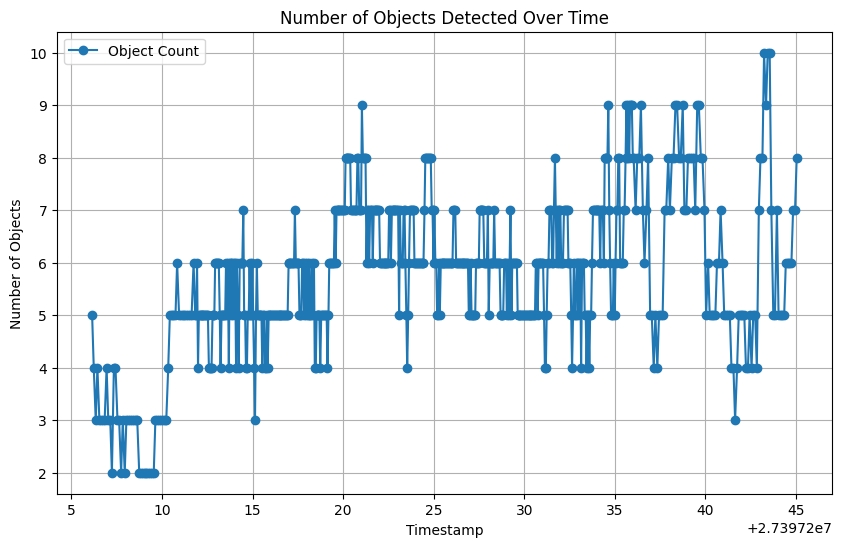

In [15]:
# Line plot for number of objects over time
plt.figure(figsize=(10, 6))
plt.plot(df["timestamp"], df["num_objects"], label="Object Count", marker="o")
plt.title("Number of Objects Detected Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Number of Objects")
plt.legend()
plt.grid()
plt.show()
